In [1]:
import sys,os
sys.path.append(os.getcwd())
sys.path.append(os.getcwd()[:-8]+'src')
from Algorithms import *
from metrics import *
import seaborn as sns
import matplotlib
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)                 
plt.style.use('default')#../misc/report.mplstyle')
cust_cmap =sns.color_palette("flare_r", as_cmap=True)
cust_cmap2 = matplotlib.cm.get_cmap('Set2')#.colors
plt.rcParams["font.family"] = "Arial"
cm = 1/2.54

In [2]:
#Load dataset
resp = np.load('/Users/constb/Data/PachitariuData/Drifting/gratings_drifting_GT1_2019_04_12_1.npy',allow_pickle=True).item()


/var/folders/16/v7n9r3kd5jb_n_2jxmxrldyw0000gp/T/ipykernel_40825/3309959853.py:20: RuntimeWarning: Mean of empty slice
  avg_responses_lowres[c] = np.nanmean(responses[:,bin_indx],1)


(array([[0., 1., 0., ..., 4., 3., 0.],
        [0., 2., 3., ..., 3., 2., 0.],
        [0., 0., 3., ..., 1., 3., 1.],
        ...,
        [0., 2., 2., ..., 1., 0., 0.],
        [1., 4., 1., ..., 1., 0., 0.],
        [0., 4., 6., ..., 2., 0., 0.]]),
 array([  3. ,   8.6,  14.2,  19.8,  25.4,  31. ,  36.6,  42.2,  47.8,
         53.4,  59. ,  64.6,  70.2,  75.8,  81.4,  87. ,  92.6,  98.2,
        103.8, 109.4, 115. , 120.6, 126.2, 131.8, 137.4, 143. , 148.6,
        154.2, 159.8, 165.4, 171. , 176.6, 182.2, 187.8, 193.4, 199. ,
        204.6, 210.2, 215.8, 221.4, 227. , 232.6, 238.2, 243.8, 249.4,
        255. , 260.6, 266.2, 271.8, 277.4, 283. , 288.6, 294.2, 299.8,
        305.4, 311. , 316.6, 322.2, 327.8, 333.4, 339. , 344.6, 350.2,
        355.8, 361.4, 367. , 372.6, 378.2, 383.8, 389.4, 395. , 400.6,
        406.2, 411.8, 417.4, 423. , 428.6, 434.2, 439.8, 445.4, 451. ,
        456.6, 462.2, 467.8, 473.4, 479. , 484.6, 490.2, 495.8, 501.4,
        507. , 512.6, 518.2, 523.8, 529.4

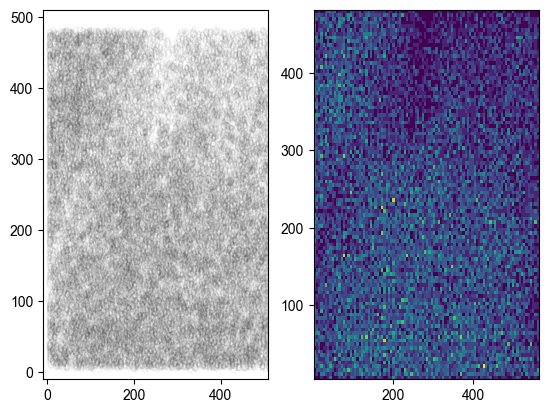

In [3]:
responses = resp['sresp']
indices=  resp['istim']
if len(responses.T)>len(indices):
    responses = responses[:,:len(indices)]
uniq_ids = np.unique(indices)
stim_res = 126
stim_lowres = 32
stim_bins = np.linspace(0,2*np.pi+2*np.pi/(stim_res+4),stim_res+2)[:-1]#np.linspace(uniq_ids[0],uniq_ids[-1],61)# We added 2*np.pi/60 to get degrees of distance 6 apart.
stim_bins_lowres = np.linspace(0,2*np.pi+2*np.pi/12,stim_lowres)[:-1]#np.linspace(uniq_ids[0],uniq_ids[-1],61)
stim_bins_degrees = (180*stim_bins/np.pi)

#responses = responses/np.max(responses)
avg_responses = np.zeros([len(stim_bins)-1,len(responses)])
avg_responses_lowres = np.zeros([len(stim_bins_lowres)-1,len(responses)])
for c in range(len(stim_bins)-1):
    bin_indx = np.where(np.logical_and(stim_bins[c]<indices,indices<stim_bins[c+1]))[0]
    avg_responses[c] = np.nanmean(responses[:,bin_indx],1)
for c in range(len(stim_bins_lowres)-1):
    bin_indx = np.where(np.logical_and(stim_bins_lowres[c]<indices,indices<stim_bins_lowres[c+1]))[0]
    avg_responses_lowres[c] = np.nanmean(responses[:,bin_indx],1)

#rand_idx = np.random.choice(np.arange(0,len(avg_responses)),50,replace=False)
#print(np.shape(avg_responses))
#avg_responses = avg_responses[rand_idx,:]
#avg_responses_lowres = avg_responses_lowres[rand_idx,:]
#print(np.shape(avg_responses))

response_locations = extract_cell_RFs(resp)

fig, (ax1,ax2) = plt.subplots(1,2)
for i in range(len(response_locations[0])):
    c = plt.Circle(response_locations[0][i],response_locations[1][i],fill=False,alpha=0.05)
    ax1.add_patch(c)
ax1.set_xlim(-10,510)
ax1.set_ylim(-10,510)
ax2.hist2d(response_locations[0][:,0],response_locations[0][:,1],100)

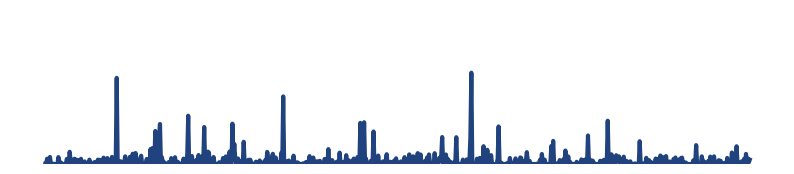

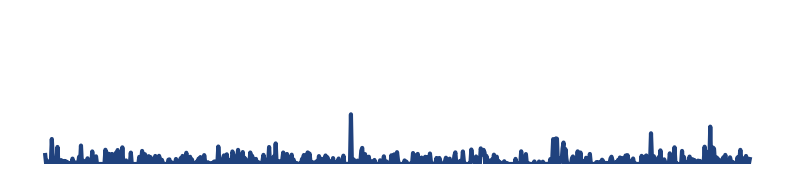

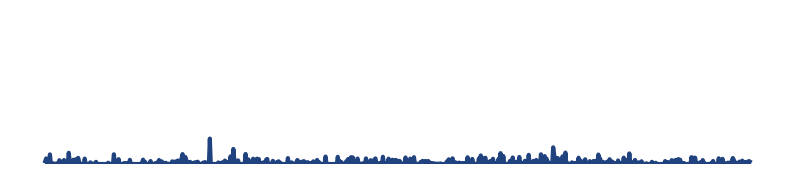

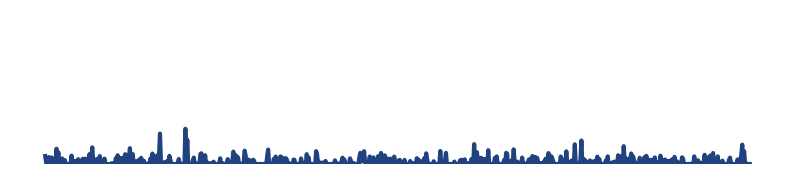

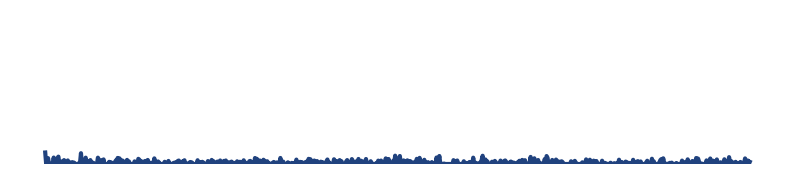

In [4]:
rand_cls = np.random.randint(0,len(responses),5)
max_rcell = np.max(responses[rand_cls])
for c,rcell in enumerate(rand_cls):
    plt.figure(figsize=(10,2))
    plt.plot(responses[rcell,:750],color='#20427eff',linewidth=3)
    plt.ylim(0,max_rcell+50)
    plt.axis('off')
    #plt.savefig('/Users/constb/Figures/NeuralHomology/cell_trace_'+str(c)+'.png',dpi=300,transparent=True)


In [5]:
#optionally select cells in a specific subregion of the image
cell_filter=False
if cell_filter:
    center_limits_high = [275,275]
    center_limits_low = [225,225]
    indx = np.where(np.logical_and(center_limits_low[1]<response_locations[0][:,1],
                                   (np.logical_and(center_limits_low[0]<response_locations[0][:,0],
                                                   np.logical_and(response_locations[0][:,0]<center_limits_high[0],response_locations[0][:,1]<center_limits_high[1])))))[0]
    avg_responses = avg_responses[:,indx]
    avg_responses_lowres = avg_responses_lowres[:,indx]

1 significant 1-cocycles


(array([1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 2., 0., 0., 0.,
        0., 1., 0., 0., 2., 0., 0., 1.]),
 array([0.41373053, 0.41412183, 0.41451314, 0.41490444, 0.41529574,
        0.41568704, 0.41607834, 0.41646965, 0.41686095, 0.41725225,
        0.41764355, 0.41803485, 0.41842616, 0.41881746, 0.41920876,
        0.41960006, 0.41999137, 0.42038267, 0.42077397, 0.42116527,
        0.42155657, 0.42194788, 0.42233918, 0.42273048, 0.42312178,
        0.42351308]),
 <BarContainer object of 25 artists>)

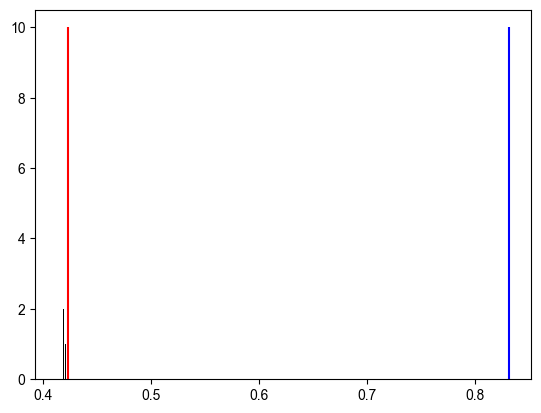

In [6]:
dim_red = 0
metric_used = geodesic_knn(k=4,adaptive=True).fit#pairwise_distances#geodesic#geodesic_knn(k=5,adaptive=True).fit#
Homologizer = Persistent_Homology()
pvalue_hom = Homologizer.perm_test(avg_responses,metric_used,n_perms=10,pval=100)
hom_data = Homologizer(avg_responses,metric_used,False,dim_red,[1,None])
cycle_lengths = hom_data[1][1][:,1]-hom_data[1][1][:,0]

plt.figure()
plt.vlines(pvalue_hom[1],0,10,'b')
plt.vlines(pvalue_hom[0],0,10,'r')
plt.hist(pvalue_hom[2],25,color='k')


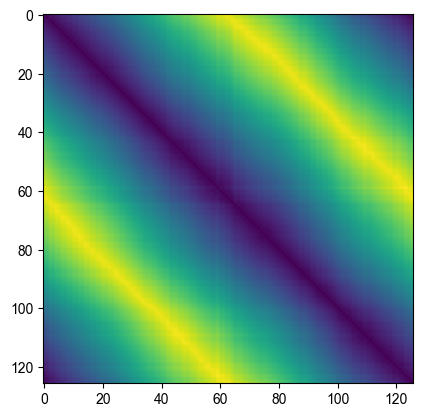

In [7]:
plt.imshow(hom_data[0])

Max cycle index is: 0


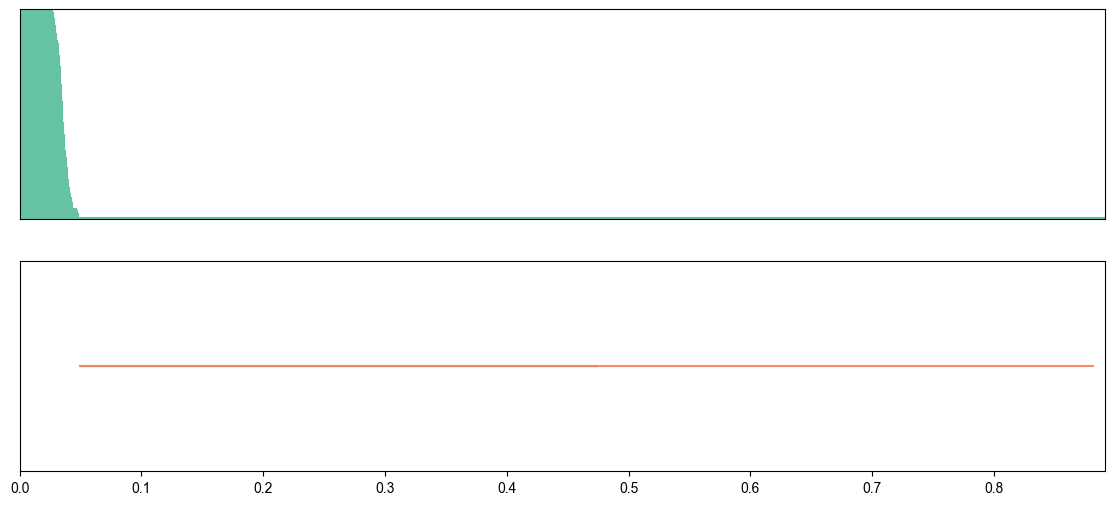

In [8]:
max_cycle = np.argsort(cycle_lengths).astype(int)[-1]
print('Max cycle index is: ' + str(max_cycle))
dmult=0.5
hom_crossection = hom_data[1][1][max_cycle][0]+ dmult*(hom_data[1][1][max_cycle][1]-hom_data[1][1][max_cycle][0])

Homologizer.barcode_plot(hom_data[1],2,pval=pvalue_hom[0])
#plt.vlines(hom_crossection,-1,2,'k',linewidth=5)
#plt.savefig('barcode_geodesic.png',dpi=1000)

/opt/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


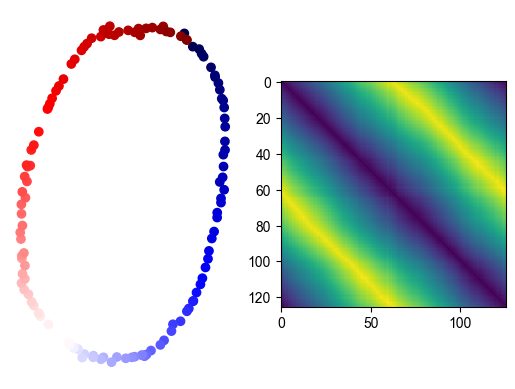

In [9]:
reducer = umap.UMAP(n_neighbors=50,min_dist=0,n_components=2,metric='precomputed')#PCA(n_components=2)#Random_Projector(n_components=2)#PCA(n_components=2)#
ori_mfld = reducer.fit_transform(hom_data[0])

fig = plt.figure()
plt.subplot(121)
plt.scatter(ori_mfld[:,0],ori_mfld[:,1],cmap='seismic',c=stim_bins[:-1])
plt.axis('off')

plt.subplot(122)
plt.imshow(hom_data[0])

#plt.savefig('PCA_manifold_euclid.png',dpi=1000)

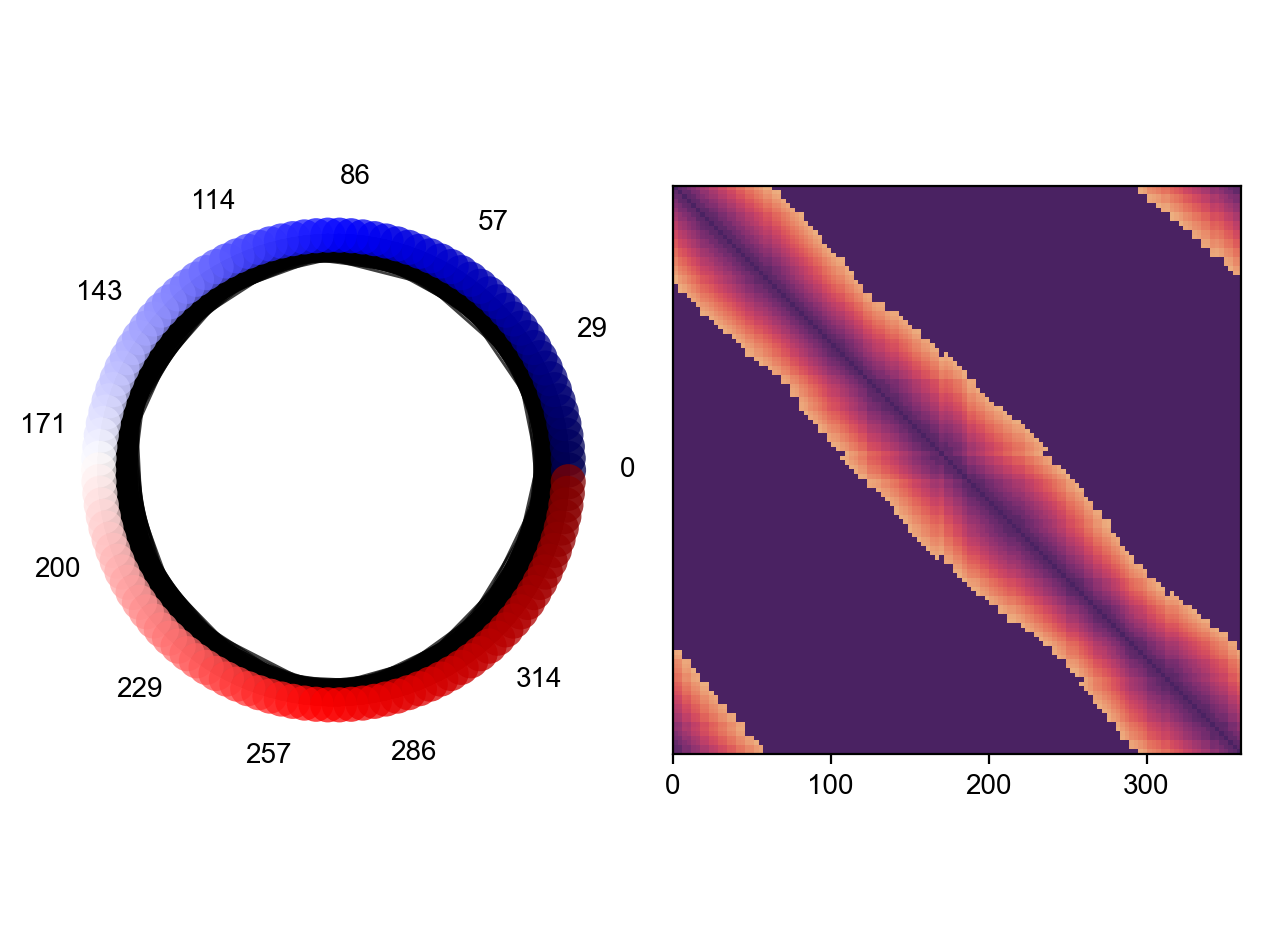

In [10]:
edge_dist = np.copy(hom_data[0])
edge_dist[edge_dist>hom_crossection] = 0

BA = Barcode_Analyzer()

plt.figure(dpi=200)
plt.subplot(121)
BA.plotCocycle2D(hom_data[0],ori_mfld[:,:2],hom_crossection,labels=stim_bins_degrees,node_cmap='seismic')
plt.subplot(122)
plt.imshow(edge_dist, extent=[0,360,360,0],cmap=cust_cmap)
plt.yticks([])
plt.tight_layout()
#plt.savefig('Nmanifold_euclid.png')

### Extract different tunning curves to see if they generate different manifolds

3024
282
20
53


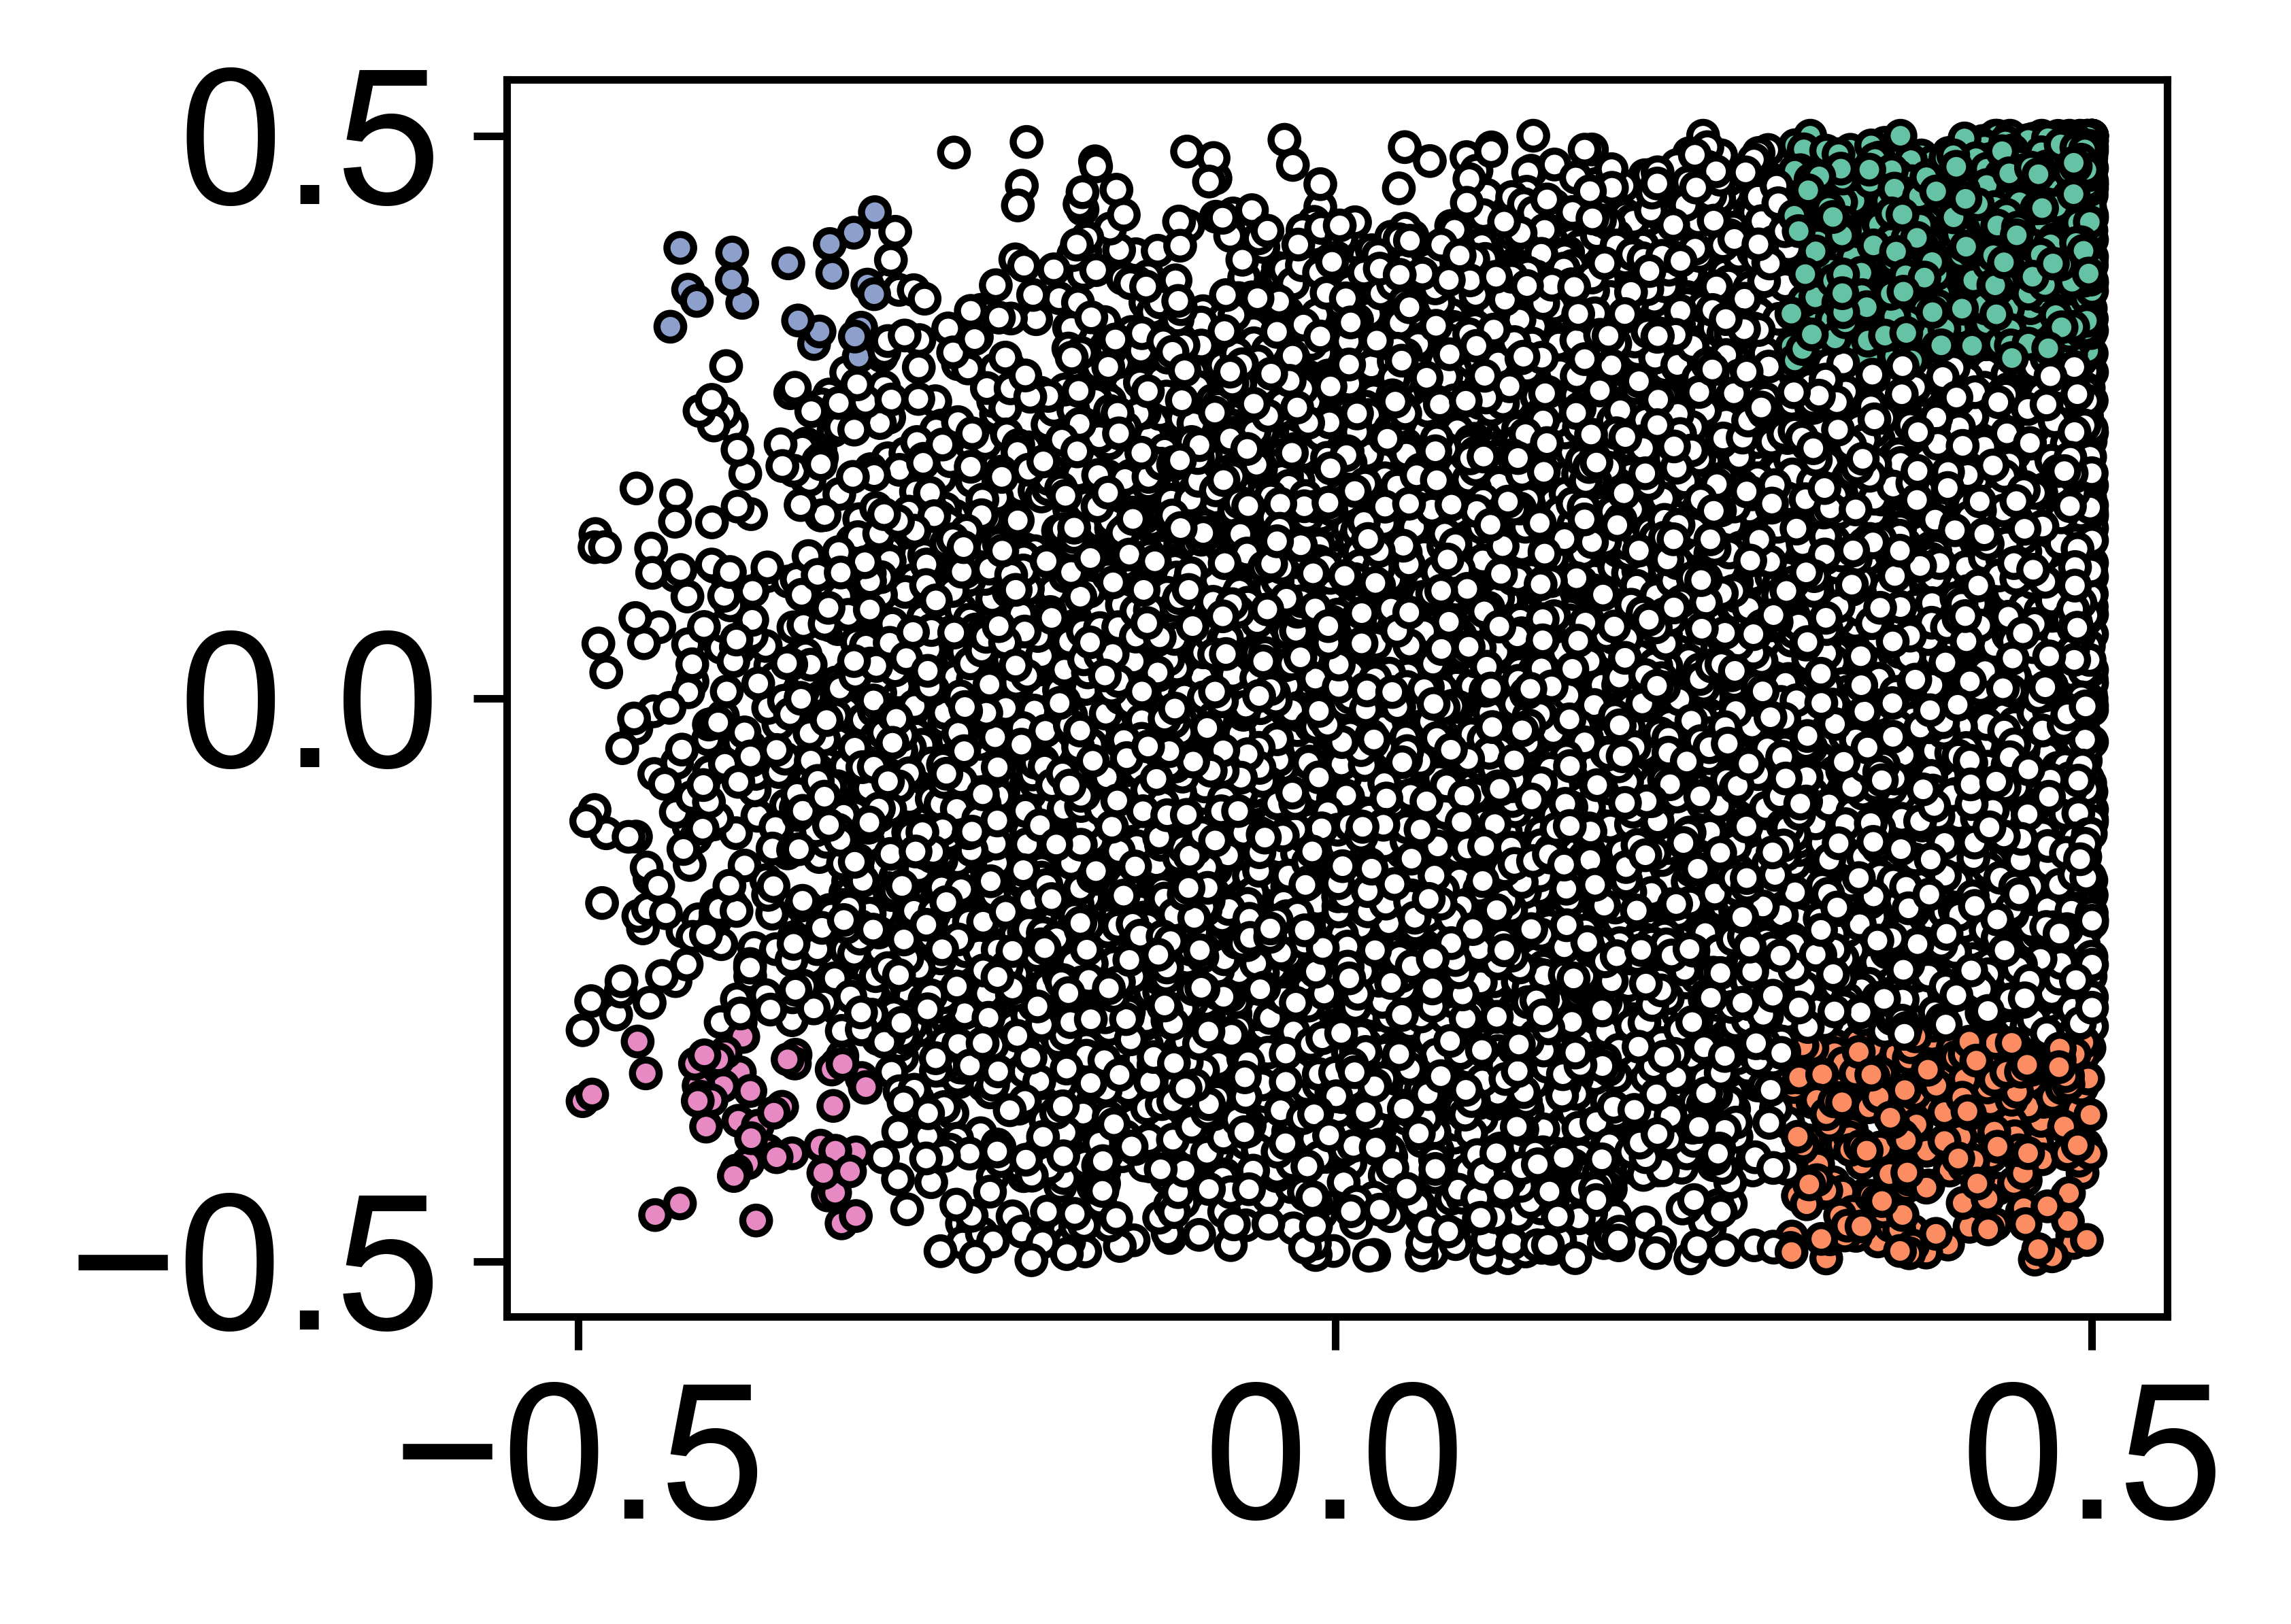

In [11]:
osi = orientation_selectivity_index(avg_responses,stim_bins[:-1])#angle_selectivity_index(avg_responses_lowres,4)#
dsi = direction_selectivity_index(avg_responses,stim_bins[:-1])#angle_selectivity_index(avg_responses_lowres,2)#


osi_centered = osi-0.5
dsi_centered = dsi-0.5
si_2d = np.vstack([osi_centered,dsi_centered]).T
xy_boundaries = (0.3,0.3)#np.mean(si_2d,1)#

n_clusters = 4
#si_clusters = si_clustering(avg_responses_lowres,[2,4],n_clusters)

#angle_invar_clusters = angle_invar_clustering(avg_responses_lowres.T,n_clusters)#list(np.arange(2,16)))
#print(np.shape(angle_invar_clusters[0]))
#clust_labels = si_clusters#angle_invar_clusters[1]

N_sub = 101
neuron_clusters = []
unimodal_neurons = np.where(np.logical_and(osi_centered>xy_boundaries[0],dsi_centered>xy_boundaries[1]))[0]#clust_labels==0)[0]#
bimodal_neurons = np.where(np.logical_and(osi_centered>xy_boundaries[0],dsi_centered<-xy_boundaries[1]))[0]#clust_labels==1)[0]#
nonlinear_neurons = np.where(np.logical_and(osi_centered<-xy_boundaries[0],dsi_centered>xy_boundaries[1]))[0]#clust_labels==2)[0]#
noise_neurons = np.where(np.logical_and(osi_centered<-xy_boundaries[0],dsi_centered<-xy_boundaries[1]))[0]#clust_labels==3)[0]#
#unimodal_neurons = unimodal_neurons[np.argsort(np.linalg.norm(si_2d[unimodal_neurons],ord=1,axis=1))[-N_sub:]]
#bimodal_neurons = bimodal_neurons[np.argsort(np.linalg.norm(si_2d[bimodal_neurons],ord=1,axis=1))[-N_sub:]]
#nonlinear_neurons = nonlinear_neurons[np.argsort(np.linalg.norm(si_2d[nonlinear_neurons],ord=1,axis=1))[-N_sub:]]
#noise_neurons = noise_neurons[np.argsort(np.linalg.norm(si_2d[noise_neurons],ord=1,axis=1))[-N_sub:]]
print(len(unimodal_neurons))
print(len(bimodal_neurons))
print(len(nonlinear_neurons))
print(len(noise_neurons))
neuron_clusters = [unimodal_neurons,bimodal_neurons,nonlinear_neurons,noise_neurons]
color_labels = np.ones([len(osi_centered),3])
#clust_means = np.zeros(n_clusters)
#for i in range(n_clusters):
#    neuron_clusters.append(np.where(clust_labels==i)[0])
#    clust_means[i] = (np.mean(angle_invar_clusters[0][neuron_clusters[-1]],0)-np.mean(angle_invar_clusters[0][neuron_clusters[-1]]))[int(len(stim_bins_lowres)/2)]
#cluster_reorder = np.argsort(clust_means)
#neuron_clusters = [neuron_clusters[i] for i in cluster_reorder]
for i in range(n_clusters):
    color_labels[neuron_clusters[i]] = cust_cmap2.colors[i]
plt.rc('axes', axisbelow=True)
font = {'size'   : 20}
matplotlib.rc('font', **font)

plt.figure(dpi=1000,figsize=(8*cm,6*cm))
#plt.axhline(y=0, color='k')
#plt.axvline(x=0, color='k')
#plt.axhline(y=xy_boundaries[1], color='k')
#plt.axvline(x=xy_boundaries[0], color='k')
#plt.axvline(x=-xy_boundaries[0], color='k')
#plt.axhline(y=-xy_boundaries[1], color='k')
plt.scatter(osi_centered,dsi_centered,s=8,c=color_labels,edgecolor='black',linewidths=0.75)
#plt.xlabel('OSI')
#plt.ylabel('DSI')

#plt.savefig('/Users/constb/Figures/NeuralHomology/cell_classification_'+str(N_sub)+'.png',transparent=True,dpi=1000, bbox_inches='tight')

In [12]:
von_mises_tuning_curves = np.zeros(np.shape(avg_responses))
von_mises_1st = np.zeros(np.shape(avg_responses))
von_mises_2nd = np.zeros(np.shape(avg_responses))
tuning_parameters = np.zeros([len(avg_responses.T),7])
r2_scores = np.zeros(len(avg_responses.T))
for n in range(len(avg_responses.T)):
    f, f1, f2, params = fit_von_mises(stim_bins[:-1],avg_responses[:,n]/np.linalg.norm(avg_responses[:,n]))
    von_mises_tuning_curves[:,n] = f*np.linalg.norm(avg_responses[:,n])
    von_mises_1st[:,n] = f1
    von_mises_2nd[:,n] = f2
    tuning_parameters[n] = params
    r2_scores[n] = r2_score(avg_responses[:,n],von_mises_tuning_curves[:,n])
    if n%500==0:
        print(n)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500


(-0.3115904282406594,
 6.543398993053847,
 -0.7122721757207598,
 14.957715690135956)

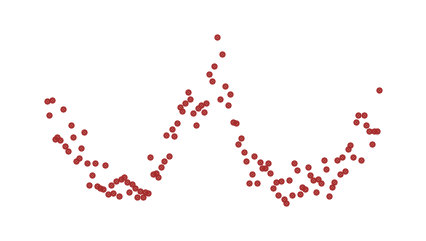

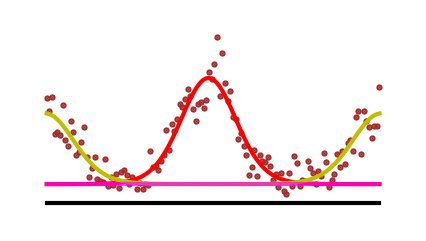

In [13]:
#example cell fitting plots
indx=132
sel_cell = avg_responses[:,r2_scores>0.8][:,indx]
sel_fit_1 = np.linalg.norm(avg_responses[:,r2_scores>0.8][:,indx])*von_mises_1st[:,r2_scores>0.8][:,indx]#von_mises_tuning_curves[:,r2_scores>0.8][:,indx]
sel_fit_2 = np.linalg.norm(avg_responses[:,r2_scores>0.8][:,indx])*von_mises_2nd[:,r2_scores>0.8][:,indx]#von_mises_tuning_curves[:,r2_scores>0.8][:,indx]
sel_baseline = np.linalg.norm(avg_responses[:,r2_scores>0.8][:,indx])*tuning_parameters[r2_scores>0.8,-1][indx]*np.ones(len(stim_bins[:-1]))

plt.figure(figsize=(4*cm,2*cm),dpi=300)
plt.plot(stim_bins[:-1], sel_cell, '.',color='brown',markersize=1)
plt.axis('off')
#plt.savefig('/Users/constb/Figures/NeuralHomology/rand_cell.png',transparent=True,dpi=1000, bbox_inches='tight')

plt.figure(figsize=(4*cm,2*cm),dpi=300)
plt.plot(stim_bins[:-1], sel_cell, '.',color='brown', markersize=1)
plt.plot(stim_bins[:-1], sel_fit_1, 'r',lw=1)
plt.plot(stim_bins[:-1], sel_fit_2, 'y',lw=1)
plt.plot(stim_bins[:-1],sel_baseline,'magenta',alpha=0.7,lw=1)
plt.plot(stim_bins[:-1],np.zeros(len(stim_bins[:-1])),'black',lw=1)
plt.axis('off')
#plt.savefig('/Users/constb/Figures/NeuralHomology/rand_cell_fit.png',transparent=True,dpi=1000, bbox_inches='tight')


findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans Mono'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


0.5443124214271764


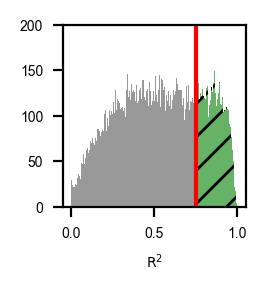

In [14]:
r2_thresh = 0.75
plt.rcParams.update({'font.size': 5})

plt.figure(figsize=(3*cm,3*cm),dpi=200)
plt.hist(r2_scores[r2_scores<r2_thresh],np.linspace(0,1,200),color='black',alpha=0.4)
plt.hist(r2_scores[r2_scores>=r2_thresh],np.linspace(0,1,200),color='green',alpha=0.6,hatch='//')

plt.vlines(r2_thresh,0,200,'red')
plt.ylim(0,200)
plt.xlabel('$R^2$')
#plt.savefig('/Users/constb/Figures/NeuralHomology/fit_r2_hist.png',transparent=True,dpi=1000, bbox_inches='tight')

print(np.median(r2_scores))

/var/folders/16/v7n9r3kd5jb_n_2jxmxrldyw0000gp/T/ipykernel_40825/23889121.py:9: RuntimeWarning: invalid value encountered in arccos
  widths1 = 2*np.arccos(np.log((np.exp(tuning_parameters[r2_scores>r2_thresh,2])+np.exp(-tuning_parameters[r2_scores>r2_thresh,2]))/2))
/var/folders/16/v7n9r3kd5jb_n_2jxmxrldyw0000gp/T/ipykernel_40825/23889121.py:10: RuntimeWarning: invalid value encountered in arccos
  widths2 = 2*np.arccos(np.log((np.exp(tuning_parameters[r2_scores>r2_thresh,3])+np.exp(-tuning_parameters[r2_scores>r2_thresh,3]))/2))
/var/folders/16/v7n9r3kd5jb_n_2jxmxrldyw0000gp/T/ipykernel_40825/23889121.py:11: RuntimeWarning: Mean of empty slice
  widths = np.nanmean(np.vstack([widths1, widths2]),0)
/var/folders/16/v7n9r3kd5jb_n_2jxmxrldyw0000gp/T/ipykernel_40825/23889121.py:14: RuntimeWarning: divide by zero encountered in true_divide
  peak_ratio = np.max(vm1_selected,0)/np.max(vm2_selected,0)
/var/folders/16/v7n9r3kd5jb_n_2jxmxrldyw0000gp/T/ipykernel_40825/23889121.py:15: RuntimeWar

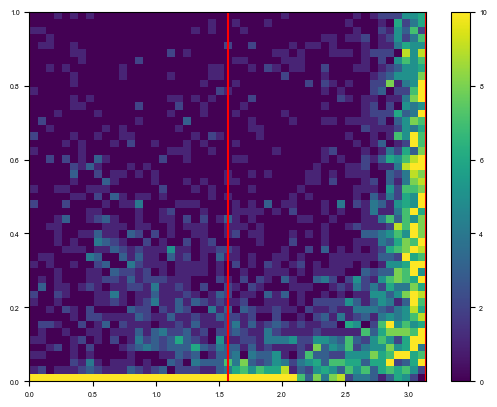

In [15]:

selected_tun_curves = avg_responses[:,r2_scores>r2_thresh]
selected_fit_curves = von_mises_tuning_curves[:,r2_scores>r2_thresh]
selected_parameters = tuning_parameters[r2_scores>r2_thresh,:]
vm1_selected = von_mises_1st[:,r2_scores>r2_thresh] - np.mean(von_mises_1st[:,r2_scores>r2_thresh],0)
vm1_selected[vm1_selected<0] = 0
vm2_selected = von_mises_2nd[:,r2_scores>r2_thresh] - np.mean(von_mises_2nd[:,r2_scores>r2_thresh],0)
vm2_selected[vm2_selected<0] = 0

widths1 = 2*np.arccos(np.log((np.exp(tuning_parameters[r2_scores>r2_thresh,2])+np.exp(-tuning_parameters[r2_scores>r2_thresh,2]))/2))
widths2 = 2*np.arccos(np.log((np.exp(tuning_parameters[r2_scores>r2_thresh,3])+np.exp(-tuning_parameters[r2_scores>r2_thresh,3]))/2))
widths = np.nanmean(np.vstack([widths1, widths2]),0)
#plt.hist(widths1[r2_scores>r2_thresh],100)

peak_ratio = np.max(vm1_selected,0)/np.max(vm2_selected,0)
peak_ratio_inv = 1/peak_ratio
peak_ratio = np.min(np.vstack([peak_ratio, peak_ratio_inv]),0)

angle_difference = np.arccos(np.cos(selected_parameters[:,0]-selected_parameters[:,1]))


from matplotlib.colors import LogNorm

plt.figure()
h, angle_edges, peak_edges = np.histogram2d(angle_difference, peak_ratio, bins=[np.linspace(0,np.pi,50),np.linspace(0,1,50)])
_ = plt.pcolormesh(angle_edges,peak_edges,h.T, rasterized=True, vmax=10)#, shading='gouraud')
plt.vlines([0,np.pi/2,np.pi],[0,0,0],[1,1,1],'r')
#plt.yscale('log')
plt.colorbar()

Text(0, 0.5, '$\\frac{\\min\\{p_1,p_2\\}}{\\max\\{p_1,p_2\\}}$')

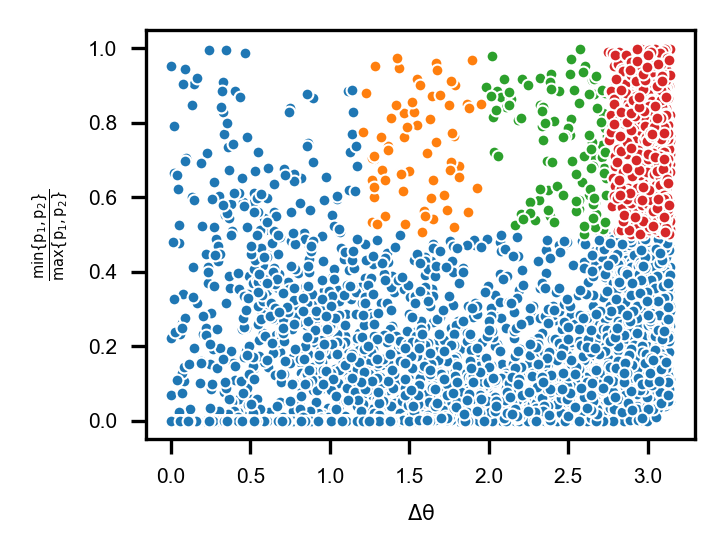

In [16]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams.update({'font.size': 5})
angle_spacing = np.pi/8
min_peak_ratio = 0.5
min_spacing = np.pi/2
edges_centers = np.arange(min_spacing,np.pi+angle_spacing,2*angle_spacing)#[:-1]
unimod = np.where(np.logical_or(peak_ratio<min_peak_ratio, angle_difference<min_spacing-angle_spacing))[0]
cell_labels_list = [unimod]
clust_responses = [selected_tun_curves[:,unimod]]
clust_responses_fitted = [selected_fit_curves[:,unimod]]
for i in range(len(edges_centers)):
    cell_labels_list.append(np.where(np.logical_and(peak_ratio>min_peak_ratio, np.logical_and(angle_difference>edges_centers[i]-angle_spacing, angle_difference<edges_centers[i]+angle_spacing)))[0])
    clust_responses.append(selected_tun_curves[:,cell_labels_list[-1]])
    clust_responses_fitted.append(selected_fit_curves[:,cell_labels_list[-1]])

plt.figure(dpi=300,figsize=(6*cm,4.5*cm))
for i in cell_labels_list:
    plt.scatter(angle_difference[i], peak_ratio[i],s=8,edgecolor='white',linewidths=0.5)

plt.xlabel('$\Delta \\theta$')
plt.ylabel('$\\frac{\min\{p_1,p_2\}}{\max\{p_1,p_2\}}$')
#plt.savefig('/Users/constb/Figures/NeuralHomology/von_Mises_classes.png',transparent=True,dpi=1000, bbox_inches='tight')


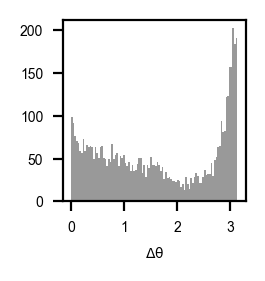

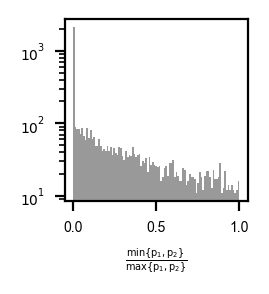

In [17]:
plt.figure(figsize=(3*cm,3*cm),dpi=200)
#for i in cell_labels_list:
plt.hist(angle_difference,np.linspace(0,np.pi,100),color='black',alpha=0.4)
plt.xlabel('$\Delta \\theta$')
#plt.savefig('/Users/constb/Figures/NeuralHomology/angle_diff_hist.png',transparent=True,dpi=1000, bbox_inches='tight')

plt.figure(figsize=(3*cm,3*cm),dpi=200)
#for i in cell_labels_list:
plt.hist(peak_ratio,np.linspace(0,1,100),color='black',alpha=0.4)
plt.xlabel('$\\frac{\min\{p_1,p_2\}}{\max\{p_1,p_2\}}$')
plt.yscale('log')
#plt.savefig('/Users/constb/Figures/NeuralHomology/peak_ratio_hist.png',transparent=True,dpi=1000, bbox_inches='tight')


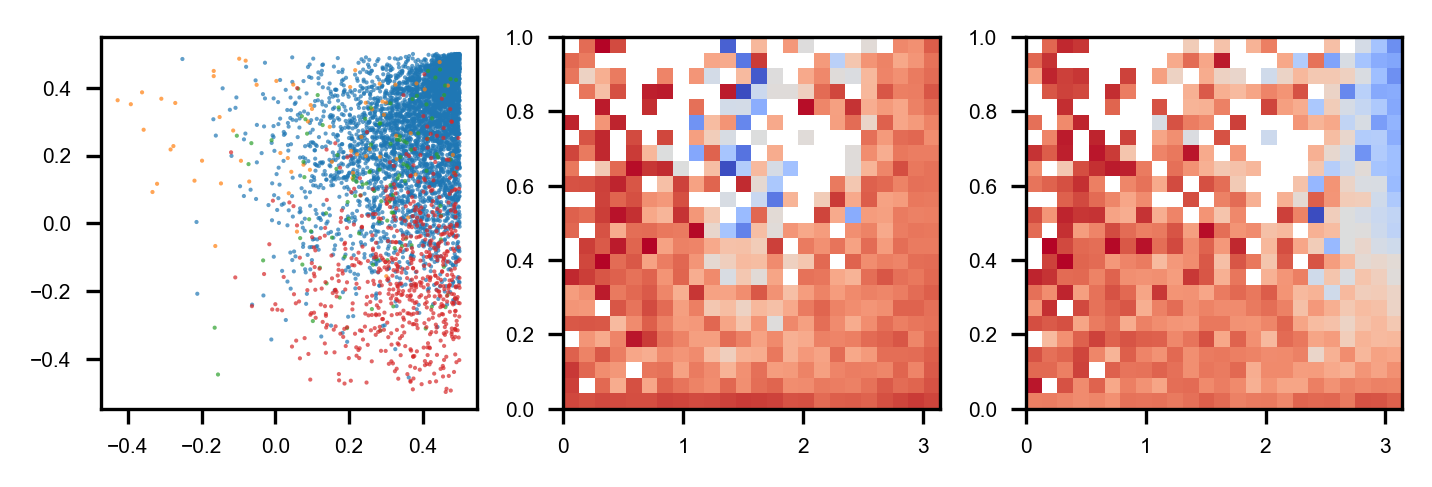

In [18]:
from scipy.stats import binned_statistic_2d

von_mises_osi = orientation_selectivity_index(selected_tun_curves,stim_bins[:-1])-0.5
von_mises_dsi = direction_selectivity_index(selected_tun_curves,stim_bins[:-1])-0.5

nbins = 25
angle_bins = np.linspace(0,np.pi,nbins)
peak_bins = np.linspace(0,1,nbins)
mean_osi = binned_statistic_2d(angle_difference, peak_ratio, von_mises_osi, statistic=np.nanmean, bins=[angle_bins, peak_bins])
mean_dsi = binned_statistic_2d(angle_difference, peak_ratio, von_mises_dsi, statistic=np.nanmean, bins=[angle_bins, peak_bins])

plt.figure(dpi=300,figsize=(12*cm,4*cm))
plt.subplot(1,3,1)
for i in cell_labels_list:
    plt.scatter(von_mises_osi[i],von_mises_dsi[i], s = 1,alpha=0.7, edgecolor='None')
plt.subplot(1,3,2)
plt.pcolormesh(angle_bins, peak_bins, mean_osi.statistic.T,rasterized=True,cmap='coolwarm')
plt.subplot(1,3,3)
plt.pcolormesh(angle_bins, peak_bins, mean_dsi.statistic.T,rasterized=True, cmap='coolwarm')
#for i in cell_labels_list:
#    plt.subplot(121)
#    plt.scatter(angle_difference[i], peak_ratio[i],c=von_mises_osi[i],s=8,linewidths=0.5,vmin=0,vmax=1)
#    plt.title('OSI')
#    plt.subplot(122)
#    plt.scatter(angle_difference[i], peak_ratio[i],c=von_mises_dsi[i],s=8,linewidths=0.5,vmin=0,vmax=1)
#    plt.title('DSI')
#plt.vlines([0,np.pi/2,np.pi],[0,0,0],[1,1,1],'k')
#plt.xlabel('angle difference')
#plt.ylabel('peak ratio')
plt.tight_layout()

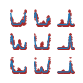

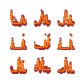

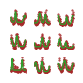

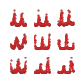

In [19]:
default_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
for n in range(len(clust_responses)):
    plt.figure(dpi=100,figsize=(2*cm,2*cm))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.plot(clust_responses[n][:,i],'.',markersize=1,color='brown')
        plt.plot(clust_responses_fitted[n][:,i],color=default_colors[n],lw=0.9)
        #plt.xticks([])
        #plt.yticks([])
        plt.axis('off')
    plt.tight_layout()
    #plt.savefig('/Users/constb/Figures/NeuralHomology/example_fits_'+str(n)+'.png',transparent=True,dpi=1000, bbox_inches='tight')


1 significant 1-cocycles
1 significant 1-cocycles
1 significant 1-cocycles
1 significant 1-cocycles


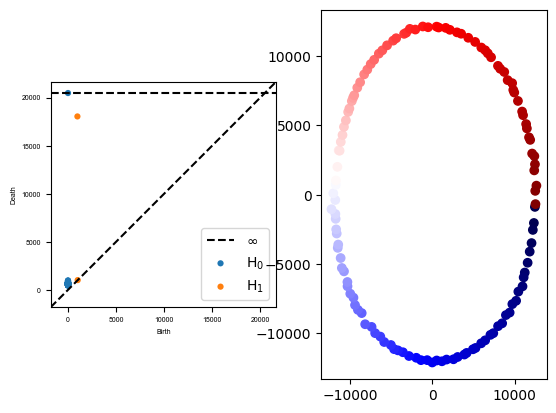

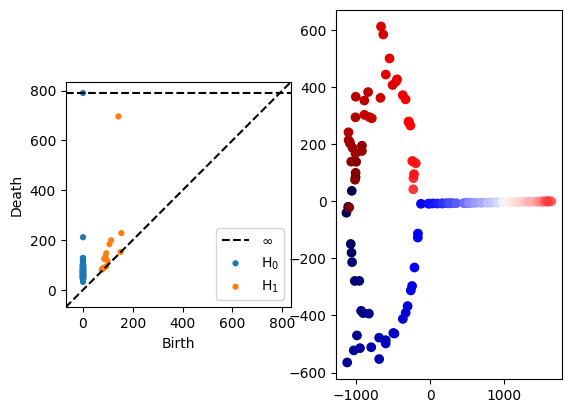

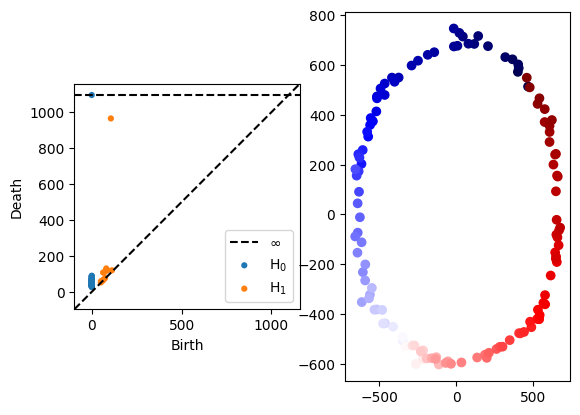

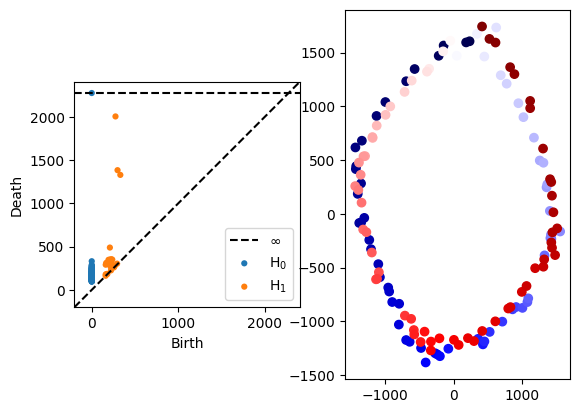

In [20]:
metric_used = geodesic_knn(k=4,adaptive=True).fit#pairwise_distances#geodesic#
reducer = Isomap(n_neighbors=4,n_components=2,metric='precomputed')
homs = []
for i, resps in enumerate(clust_responses):
    plt.figure()  
    pvalue_hom = Homologizer.perm_test(resps,metric_used,n_perms=100,pval=99.99)
    homs.append(Homologizer(resps,metric_used,False,dim_red,[1,None]))
    mfld = reducer.fit_transform(homs[i][0])
    plt.subplot(1,2,1)
    plot_diagrams(homs[i][1])
    plt.subplot(1,2,2)
    plt.scatter(mfld[:,0],mfld[:,1],c=np.linspace(0,1,len(mfld[:,0])),cmap='seismic')
    #Homologizer.barcode_plot(homs[-1][1],2)
    #plt.imshow(homs[i][0])
    #plt.colorbar()
    #BA.plotCocycle2D(homs[-1][0],ori_mfld[:,:2],900,labels=stim_bins_degrees,node_cmap='seismic')
    #plt.title(edges_spacing[i])

[  69  281  351 6304 7767 9385]


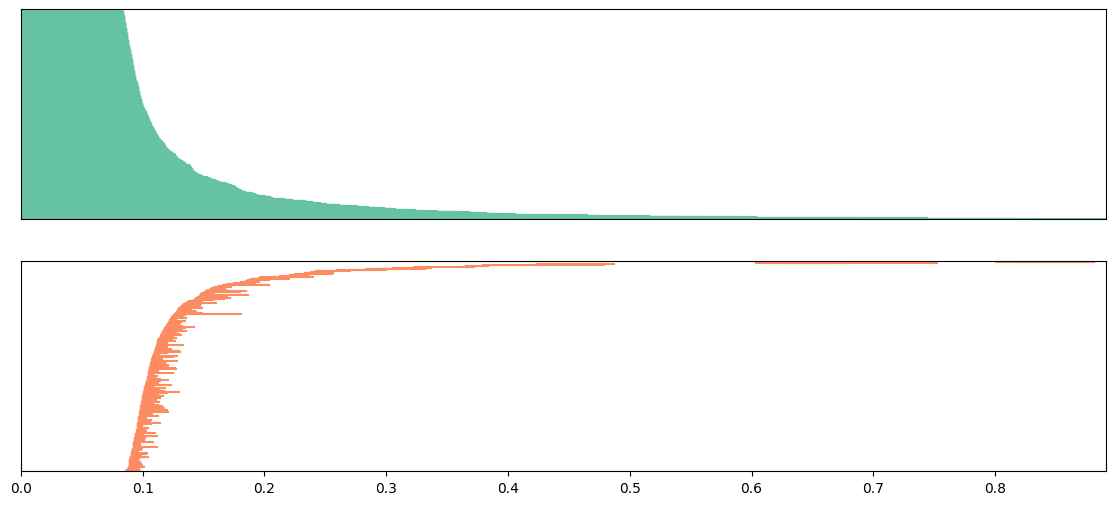

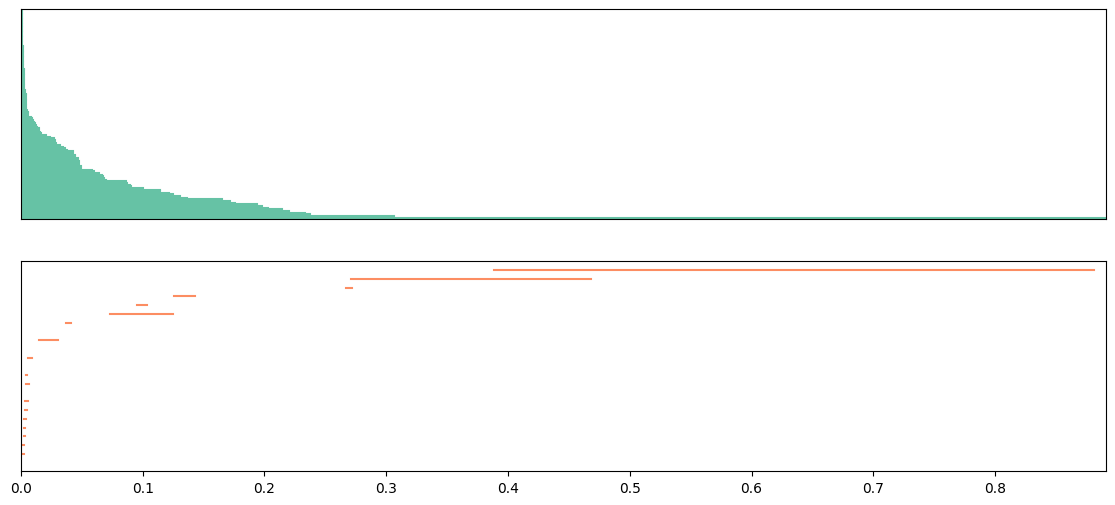

In [21]:
hom_data = Homologizer(avg_responses.T,pairwise_distances,False,dim_red,[1,1000])
Homologizer.barcode_plot(hom_data[1])

cocycles = hom_data[2][1]
cocycle_pers = hom_data[1][1][:,1]-hom_data[1][1][:,0]
cocycle_len = [len(cocycles[i]) for i in range(len(cocycles))]

max_cycle = cocycles[np.argsort(cocycle_pers)[-1]]#cocycles[np.argmax(cocycle_len)]
involved_neurons = np.unique(np.vstack(max_cycle))
involved_neurons = np.delete(involved_neurons,np.where(involved_neurons==1),0)
print(involved_neurons)

hom_data = Homologizer(avg_responses[:,involved_neurons],metric_used,False,dim_red,[1,None])
Homologizer.barcode_plot(hom_data[1])



/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


[-1  0  1  2  3  4  5  6  7]


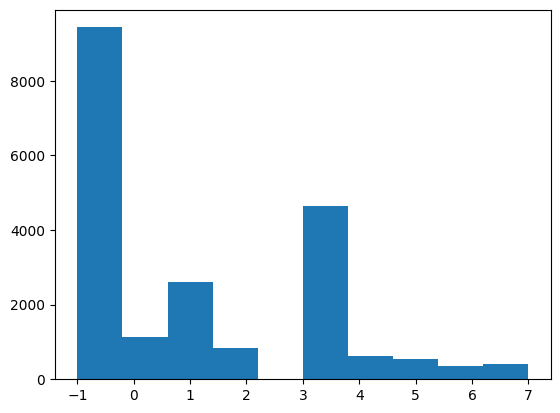

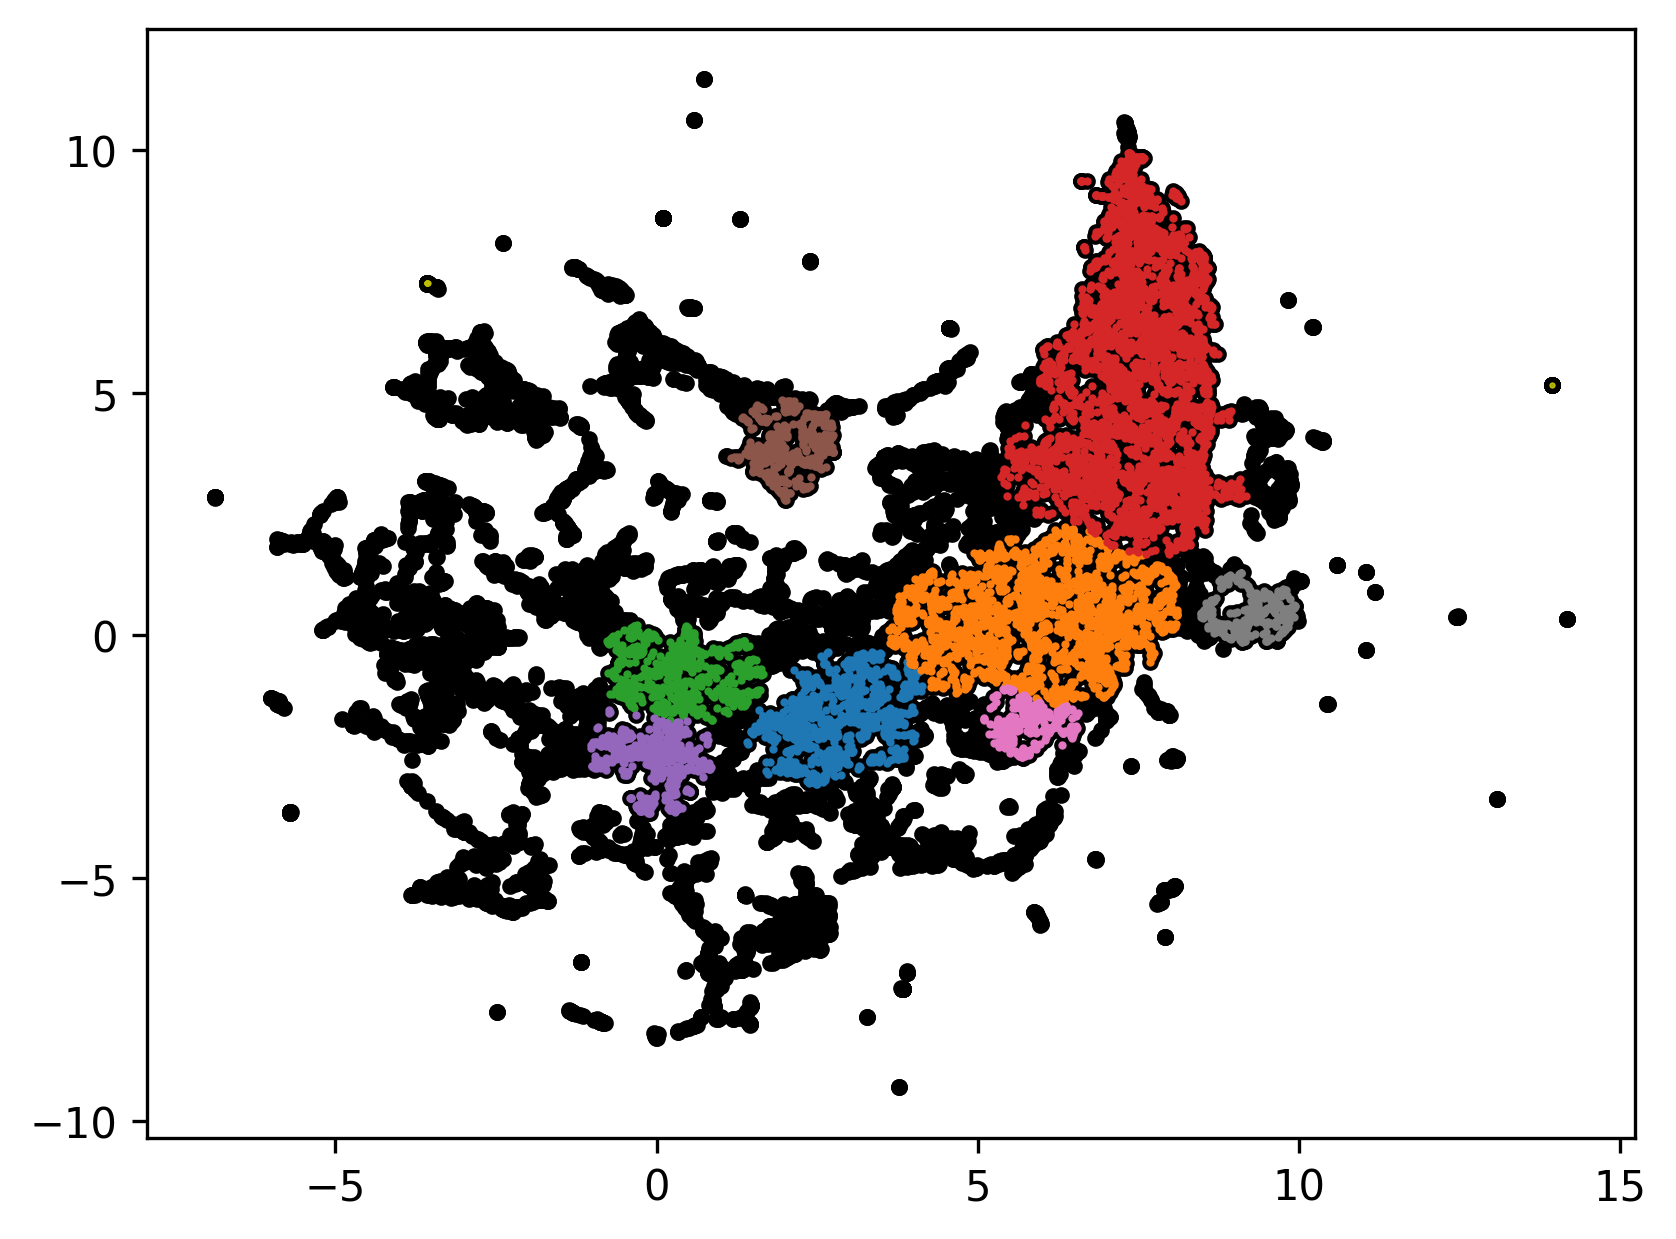

In [22]:
from sklearn.cluster import DBSCAN

reducer2 = umap.UMAP(n_neighbors=3,min_dist=0,n_components=2)
cell_mfld = reducer2.fit_transform(avg_responses.T)

clustering = DBSCAN(eps=.75,min_samples=400).fit(cell_mfld)
lbls = clustering.labels_
print(np.unique(lbls))
plt.hist(lbls)
plt.figure(dpi=300)
plt.plot(cell_mfld[:,0],cell_mfld[:,1],'ko',markersize=3)
for i in range(len(np.unique(lbls))):
    plt.plot(cell_mfld[lbls==i,0],cell_mfld[lbls==i,1],'.',markersize=2)
plt.plot(cell_mfld[involved_neurons,0],cell_mfld[involved_neurons,1],'y.',markersize=1)



In [23]:
plt.figure()
[plt.plot(stim_bins_lowres[:-1],np.mean(angle_invar_clusters[0][cn],0)-np.mean(angle_invar_clusters[0][cn]),'-o',color=cust_cmap2.colors[i]) for i,cn in enumerate(neuron_clusters)]
plt.grid('on')

NameError: name 'angle_invar_clusters' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
cluster_responses = []
[cluster_responses.append(avg_responses_lowres[:,neuron_clusters[i]]) for i in range(n_clusters)]
#[cluster_responses.append(avg_responses[:,neuron_clusters[i]][:,np.argsort(np.argmax(avg_responses[:,neuron_clusters[i]],0))][:int(stim_res/2)+1]) for i in range(n_clusters)]


#plot some random tunning curves from the two populations
fig = plt.figure(dpi=500,figsize=(8*cm,6*cm))
nplots = 2
for n in range(n_clusters):
    for i in range(nplots):
        ax = fig.add_subplot(nplots,n_clusters,i+1+n*nplots,projection='polar')
        plt.polar(stim_bins_lowres[:-1],cluster_responses[n][:,np.random.randint(len(neuron_clusters[n].T))],color=cust_cmap2.colors[n],linewidth=1)
        plt.xticks([0,np.pi/2,np.pi,(3/2)*np.pi])
        ax.set_yticklabels([])
        ax.set_xticklabels([])
plt.tight_layout()
#fig.savefig('/Users/constb/Figures/NeuralHomology/polar_plots.png',transparent=True,dpi=500, bbox_inches='tight')

In [ ]:
metric_used = geodesic_knn(k=4,adaptive=True).fit#pairwise_distances#geodesic#
dmult=0.25
homs = []
clust_cycles = []
clust_crossections = []
for i in range(n_clusters):
    homs.append(Homologizer(cluster_responses[i],metric_used,False,dim_red,[1,None]))
    clust_cycles.append(np.argsort(homs[i][1][1][:,1]-homs[i][1][1][:,0]).astype(int)[-1])
    clust_crossections.append(homs[i][1][1][clust_cycles[i]][0]+ dmult*(homs[i][1][1][clust_cycles[i]][1]-homs[i][1][1][clust_cycles[i]][0]))


In [ ]:
for i in range(n_clusters):
    Homologizer.barcode_plot(homs[i][1],2)
    plt.figure(figsize=(18*cm,18*cm))
    BA.plotCocycle2D(homs[i][0],cluster_responses[i],clust_crossections[i],labels=[],node_cmap='seismic',n_labels=0)
    plt.axis('off')
    #plt.savefig('/Users/constb/Figures/NeuralHomology/circular_graph_half'+str(i)+'.png',transparent=True,dpi=500, bbox_inches='tight')


### Extract edges at critical births

In [ ]:
edge_dists = []
for i in range(n_clusters):
    edge_dist = np.copy(homs[i][0])
    edge_dist[edge_dist>clust_crossections[i]] = 0
    edge_dists.append(edge_dist)

for i in range(n_clusters):
    plt.figure(figsize=(4*cm,4*cm))
    plt.imshow(edge_dists[i], extent=[0,360,360,0],cmap=cust_cmap)
    plt.xticks([])
    plt.yticks([])
    #plt.savefig('/Users/constb/Figures/NeuralHomology/dmat'+str(i)+'.png',transparent=True,dpi=500, bbox_inches='tight',figsize=(1*cm,1*cm))


In [ ]:
shifted_distances = []
for i in range(n_clusters):
    shifted_distances.append(shift_triag_diag(homs[i][0]))

plt.figure(dpi=200,figsize=(6,6))
for i in range(n_clusters):
    plt.subplot(n_clusters,2,1)
    norm_x = np.nanmean(homs[i][0]/np.linalg.norm(homs[i][0],2,1),0)
    plt.plot(stim_bins_degrees[:-1],norm_x,color=cust_cmap2.colors[i],linewidth=.8,markersize=3)
    plt.subplot(n_clusters,2,2)
    plt.plot(stim_bins_degrees[:-1],np.nanmean(shifted_distances[i],0),color=cust_cmap2.colors[i],linewidth=.8,markersize=3)
plt.tight_layout()

## Decoding from subpopulations

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

responses.shape

X_train, X_test, y_train, y_test = train_test_split(
     responses.T, indices, test_size=0.2)

DO_reg = LinearRegression().fit(X_train[:,unimodal_neurons],y_train)
O_reg = LinearRegression().fit(X_train[:,bimodal_neurons],y_train)
D_reg = LinearRegression().fit(X_train[:,nonlinear_neurons],y_train)
untuned_reg = LinearRegression().fit(X_train[:,noise_neurons],y_train)

DO_pred = DO_reg.predict(X_test[:,unimodal_neurons])
O_pred = O_reg.predict(X_test[:,bimodal_neurons])
D_pred = D_reg.predict(X_test[:,nonlinear_neurons])
untuned_pred = untuned_reg.predict(X_test[:,noise_neurons])

In [ ]:
print(DO_reg.score(X_test[:,unimodal_neurons],y_test))
print(O_reg.score(X_test[:,bimodal_neurons],y_test))
print(D_reg.score(X_test[:,nonlinear_neurons],y_test))
print(untuned_reg.score(X_test[:,noise_neurons],y_test))

plt.figure(dpi=200)
plt.subplot(2,2,1)
plt.plot(DO_pred,y_test,'.')


plt.subplot(2,2,2)
plt.plot(O_pred,y_test,'.')


plt.subplot(2,2,3)
plt.plot(D_pred,y_test,'.')


plt.subplot(2,2,4)
plt.plot(untuned_pred,y_test,'.')


In [ ]:
from dreimac import CircularCoords, ProjectiveCoords
X_train, X_test, y_train, y_test = train_test_split(
     avg_responses, np.arange(0,len(avg_responses)), test_size=0.2)

#X_mfld = PCA(n_components=2).fit_transform(X_train)

cc = CircularCoords(avg_responses,126)
#pc = ProjectiveCoords(avg_responses,100)

f1 = cc.get_coordinates(perc=1, cocycle_idx=[0])
f2 = cc.get_coordinates(perc=1, cocycle_idx=[1])
#f = phi

plt.scatter(ori_mfld[:, 0], ori_mfld[:, 1], c=f1+f2, cmap='magma_r')
plt.figure()
plt.plot(f1)
plt.plot(f2)